## Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import sklearn
import seaborn as sns
from scipy import stats

%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

## Read data

In [2]:
y_a = pd.read_parquet('A/train_targets.parquet')
y_b = pd.read_parquet('B/train_targets.parquet')
y_c = pd.read_parquet('C/train_targets.parquet')

X_est_a = pd.read_parquet('A/X_train_estimated.parquet')
X_est_b = pd.read_parquet('B/X_train_estimated.parquet')
X_est_c = pd.read_parquet('C/X_train_estimated.parquet')

X_obs_a = pd.read_parquet('A/X_train_observed.parquet')
X_obs_b = pd.read_parquet('B/X_train_observed.parquet')
X_obs_c = pd.read_parquet('C/X_train_observed.parquet')

X_obs_a.head()

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.0,0.0,1744.900024,0.0,280.299988,0.0,0.0,0.0,0.0,98.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.799988,0.0,0.0,994.200012,1000.299988,0.0,0.0,73.099998,1006.299988,NaN,0.0,0.0,-0.0,0.1,342.834015,-3.202,0.0,285.899994,100.0,39640.101562,3.7,-3.6,-0.8,-0.0
1,2019-06-02 22:15:00,7.7,1.229,1734.000000,0.0,0.0,1734.000000,0.0,280.299988,0.0,0.0,0.0,0.0,99.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.500000,0.0,0.0,993.900024,999.900024,0.0,0.0,72.199997,1006.000000,NaN,0.0,0.0,-0.0,0.2,346.294006,-3.650,0.0,286.100006,100.0,40123.898438,3.6,-3.6,-0.6,-0.0
2,2019-06-02 22:30:00,7.7,1.228,1723.500000,0.0,0.0,1723.500000,0.0,280.299988,0.0,0.0,0.0,0.0,99.199997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.099976,0.0,0.0,993.599976,999.599976,0.0,0.0,71.199997,1005.599976,NaN,0.0,0.0,-0.0,0.2,349.768005,-3.998,0.0,286.299988,100.0,40628.300781,3.6,-3.6,-0.4,-0.0
3,2019-06-02 22:45:00,7.7,1.226,1713.400024,0.0,0.0,1713.400024,0.0,280.299988,0.0,0.0,0.0,0.0,99.400002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.799988,0.0,0.0,993.299988,999.299988,0.0,0.0,70.199997,1005.299988,NaN,0.0,0.0,-0.0,0.2,353.251007,-4.247,0.0,286.600006,100.0,41153.601562,3.5,-3.5,-0.2,-0.0
4,2019-06-02 23:00:00,7.7,1.225,1703.599976,0.0,0.0,1703.599976,0.0,280.299988,0.0,0.0,0.0,0.0,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.500000,0.0,0.0,993.000000,999.000000,0.0,0.0,69.199997,1005.000000,NaN,0.0,0.0,-0.0,0.2,356.742004,-4.393,0.0,286.799988,100.0,41699.898438,3.5,-3.5,0.0,-0.0


## Check X data on all locations

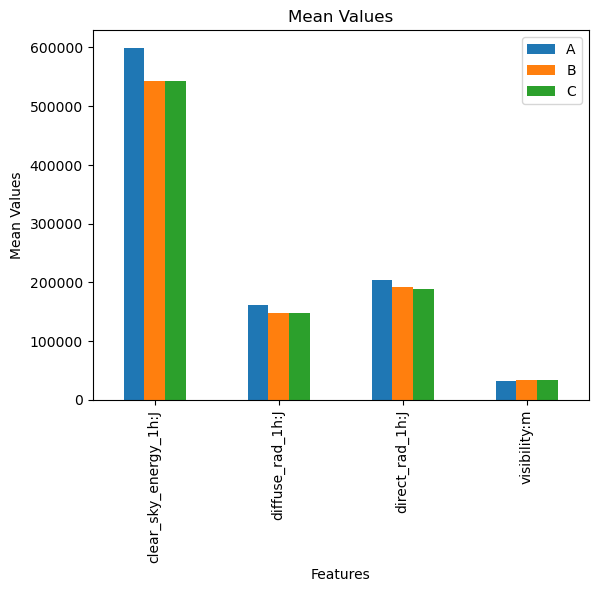

In [3]:
mean_a = X_obs_a.drop('date_forecast', axis=1).mean()
mean_b = X_obs_b.drop('date_forecast', axis=1).mean()
mean_c = X_obs_c.drop('date_forecast', axis=1).mean()

huge_indices = mean_a[mean_a > 10000].index
large_indices = mean_a[(mean_a > 1000) & (mean_a <= 10000)].index
medium_indices = mean_a[(mean_a > 100) & (mean_a <= 1000)].index
small_indices = mean_a[(mean_a > 10) & (mean_a <= 100)].index
tiny_indices = mean_a[(mean_a > 1) & (mean_a <= 10)].index
tiniest_indices = mean_a[(mean_a <= 1)].index

def display_mean_values(indices, mean_a, mean_b, mean_c):
    mean_data = {
        'A': mean_a[indices],
        'B': mean_b[indices],
        'C': mean_c[indices]
    }

    # Create a dataframe from the mean data
    mean_df = pd.DataFrame(mean_data)

    # Plot the mean values
    mean_df.plot(kind='bar')
    plt.xlabel('Features')
    plt.ylabel('Mean Values')
    plt.title('Mean Values')
    plt.show()

display_mean_values(huge_indices, mean_a, mean_b, mean_c)

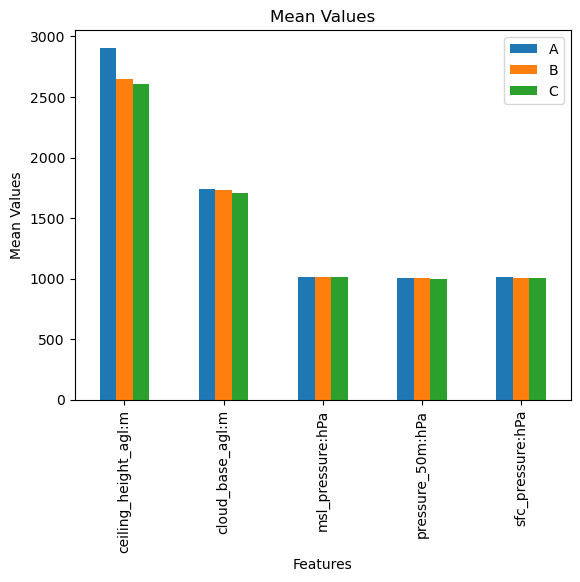

In [4]:
display_mean_values(large_indices, mean_a, mean_b, mean_c)

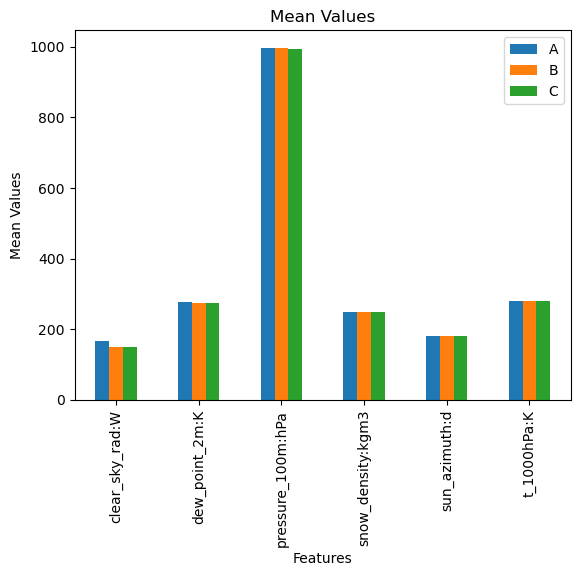

In [5]:
display_mean_values(medium_indices, mean_a, mean_b, mean_c)

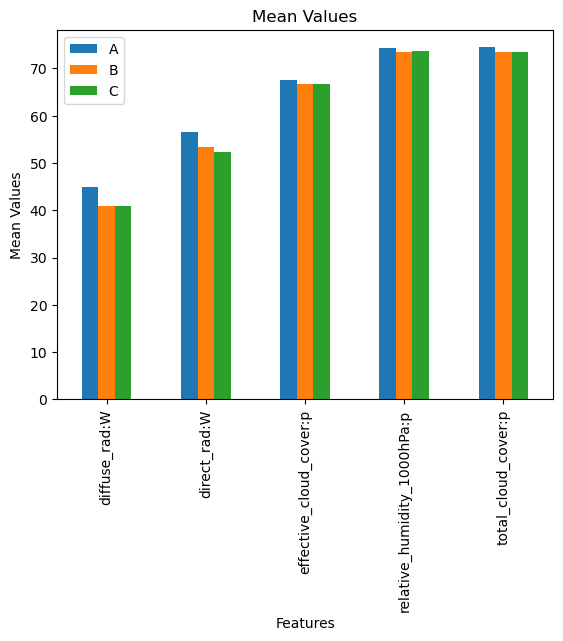

In [6]:
display_mean_values(small_indices, mean_a, mean_b, mean_c)

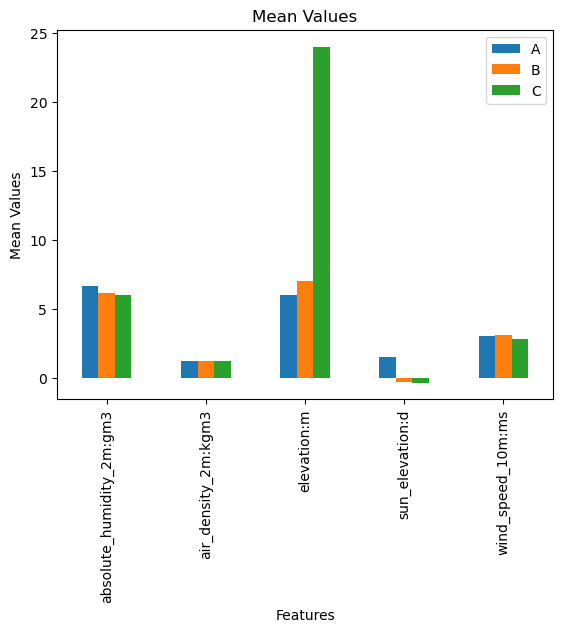

In [7]:
display_mean_values(tiny_indices, mean_a, mean_b, mean_c)

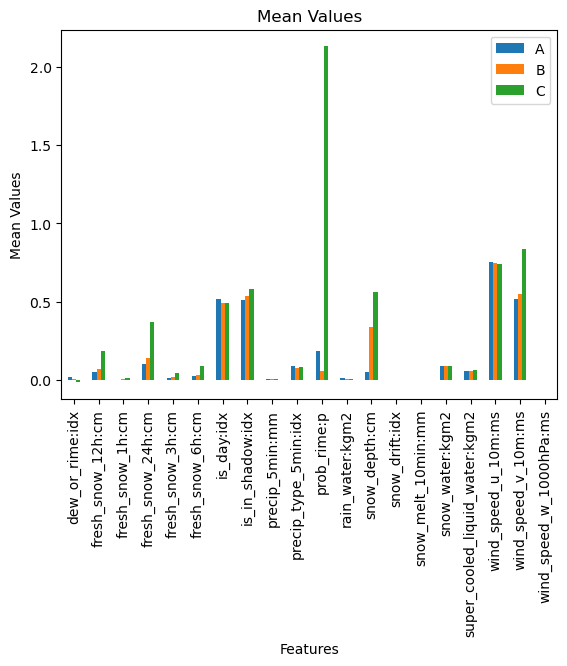

In [8]:
display_mean_values(tiniest_indices, mean_a, mean_b, mean_c)

## Observations

We can see that there are not that much of a difference i the first 5 of the plots. However, lets get a closer look at the last one:

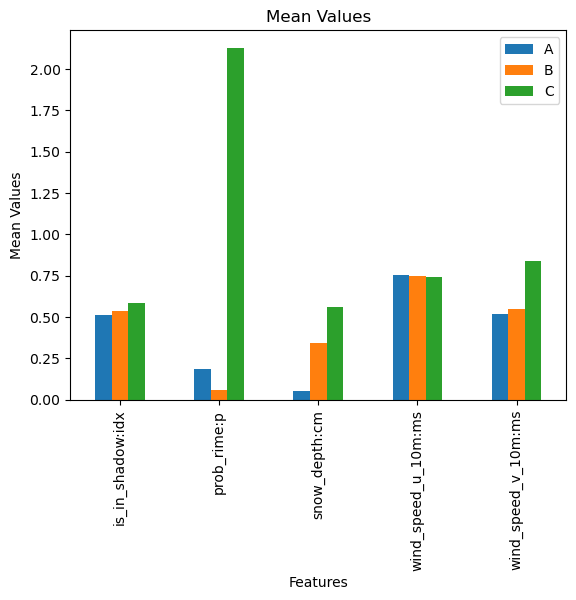

In [9]:
big_c_indices = mean_c[tiniest_indices][mean_c > 0.5].index
small_c_indices = mean_c[tiniest_indices][mean_c <= 0.5].index

display_mean_values(big_c_indices, mean_a, mean_b, mean_c)

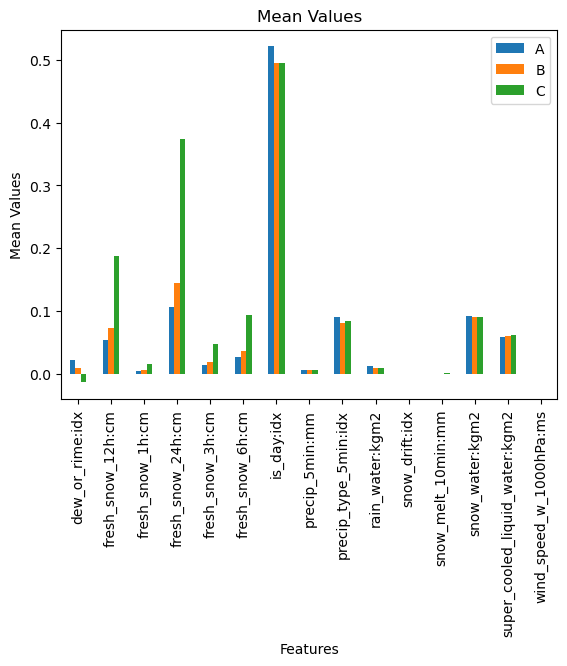

In [10]:
display_mean_values(small_c_indices, mean_a, mean_b, mean_c)

From the graphs we can see that C differentiates itself hugely in elevation and probability of rime. Additiionally it snows a lot in C, less in B and least in A. Let's look at what the **elevation** and **prob_rime** features imply:

**elevation:m** = elevation of ground above sea level [m]

**prob_rime** = rime probability [%]

Let's also look closer at the **sun_elevation** feature:

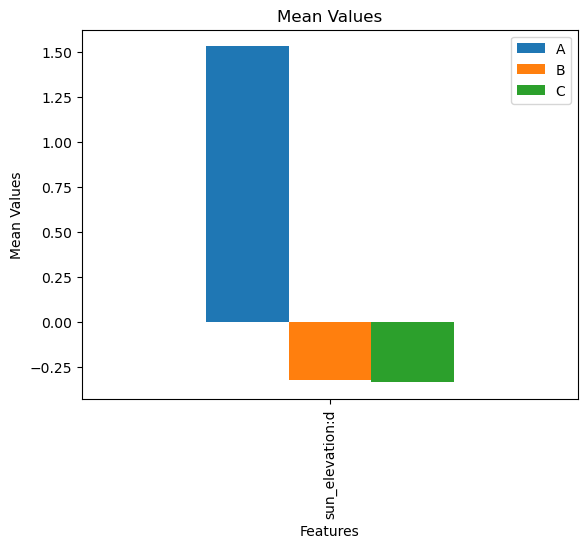

In [11]:
display_mean_values(['sun_elevation:d',], mean_a, mean_b, mean_c)

**sun_elevation:d** = The solar elevation angle (angle between the sun and the horizon) gives the position of the sun above the horizon.

This suggests that location B and C are close, and location A is in another location completely.

## Check target data on different locations

In [12]:
y_a.describe()

,time,pv_measurement
count,34085,34085.000000
mean,2021-05-14 00:29:51.497726464,630.594707
min,2019-06-02 22:00:00,0.000000
25%,2020-05-22 23:00:00,0.000000
50%,2021-05-13 00:00:00,5.940000
75%,2022-05-03 01:00:00,678.040000
max,2023-04-30 23:00:00,5733.420000
std,NaN,1165.902422


In [13]:
y_b.describe()

,time,pv_measurement
count,32848,32844.000000
mean,2020-12-07 17:46:02.031173888,96.824778
min,2018-12-31 23:00:00,-0.000000
25%,2019-12-09 05:45:00,-0.000000
50%,2020-11-15 12:30:00,0.000000
75%,2021-10-23 17:15:00,96.600000
max,2023-04-30 23:00:00,1152.300000
std,NaN,193.946487


In [14]:
y_c.describe()

,time,pv_measurement
count,32155,26095.000000
mean,2020-11-20 18:02:22.186285056,77.631060
min,2018-12-31 23:00:00,-0.000000
25%,2019-12-01 23:30:00,0.000000
50%,2020-11-01 00:00:00,0.000000
75%,2021-10-01 22:30:00,58.800000
max,2023-04-30 23:00:00,999.600000
std,NaN,165.816877


As we can see, the mean, max and std are huge on A compared to B and C. Also, notice that the data from location B and C are very similar compared to A

## Identify outliers

In [15]:
z_scores = np.abs(stats.zscore(X_obs_a.drop('date_forecast', axis=1)))
outliers = (z_scores > 3).all(axis=1)
X_obs_a[outliers].head()

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms


## Visualize outliers

### Boxplot A

<Axes: >

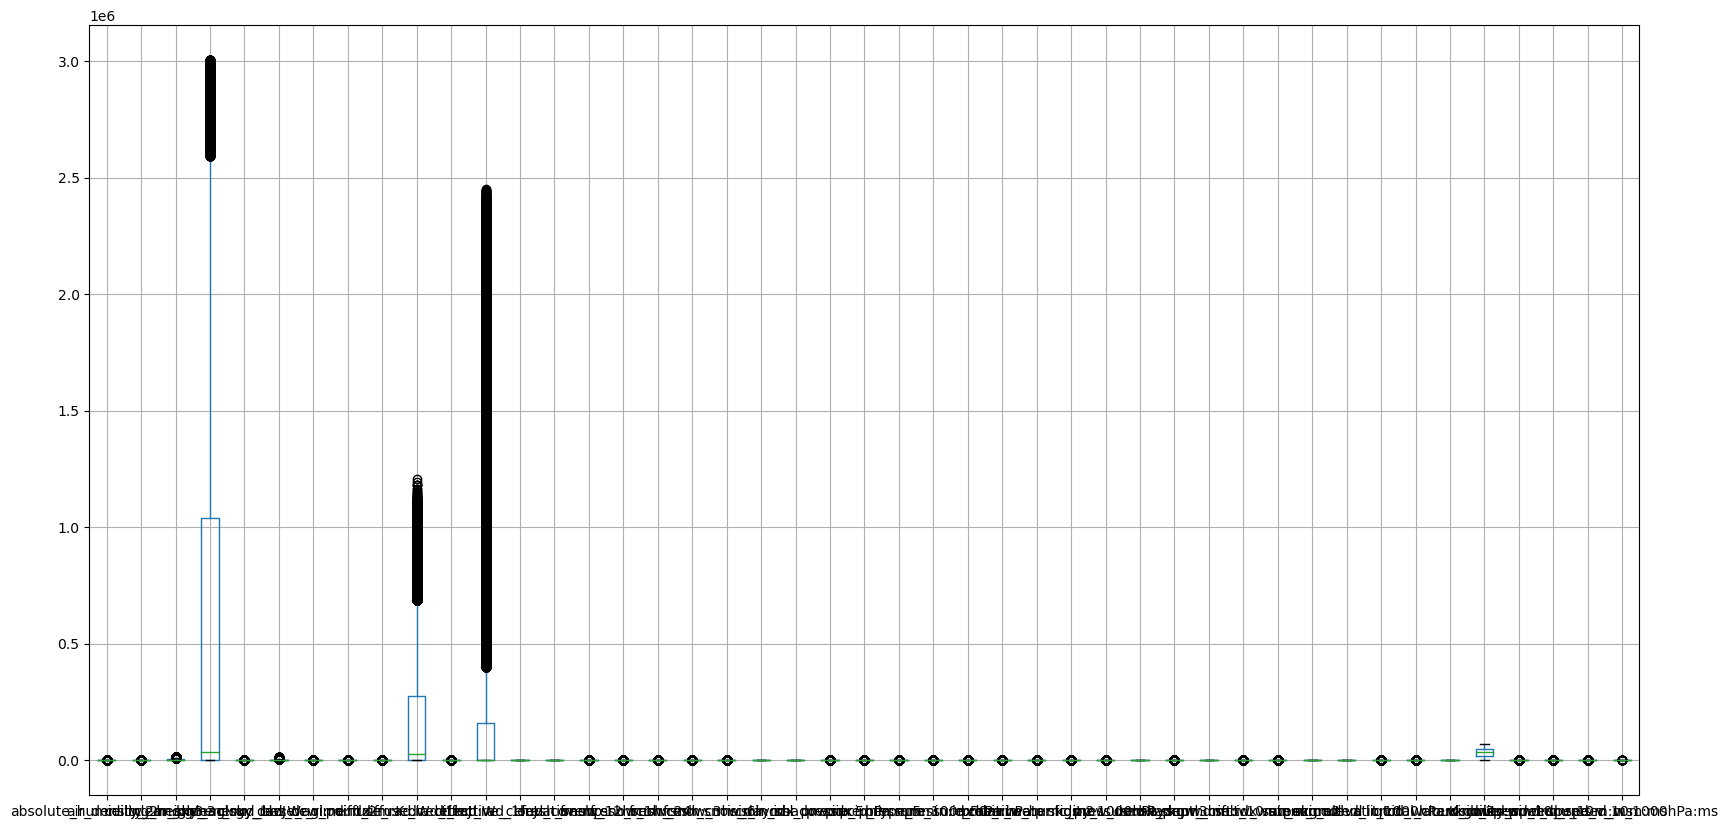

In [16]:
X_obs_a.boxplot(figsize=(20, 10))

### Boxplot B

<Axes: >

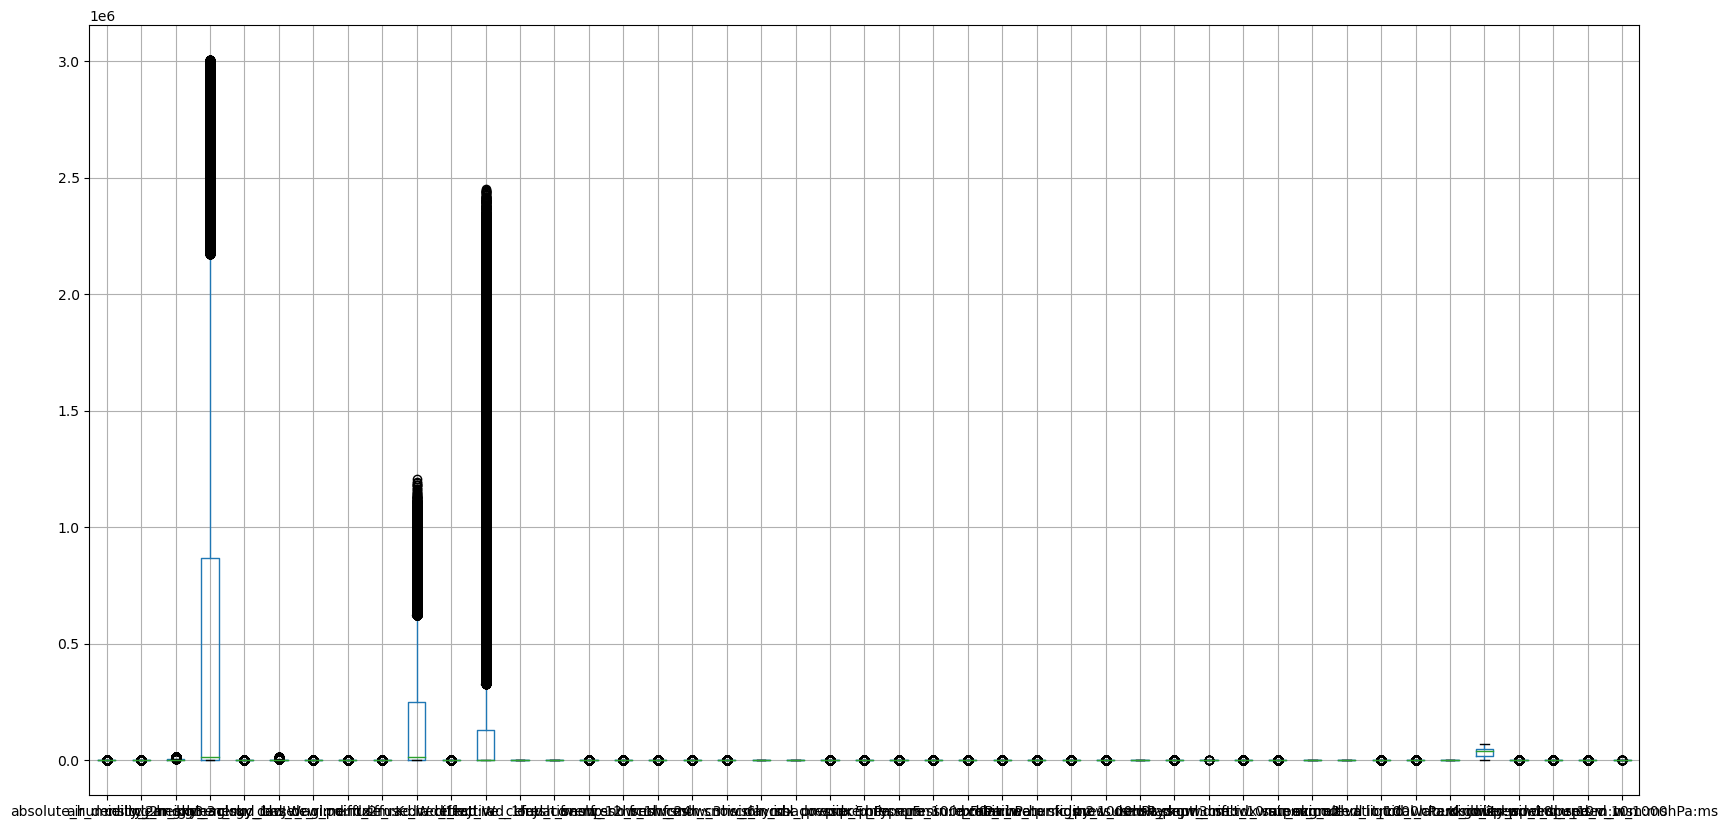

In [17]:
X_obs_b.boxplot(figsize=(20, 10))

### Boxplot C

<Axes: >

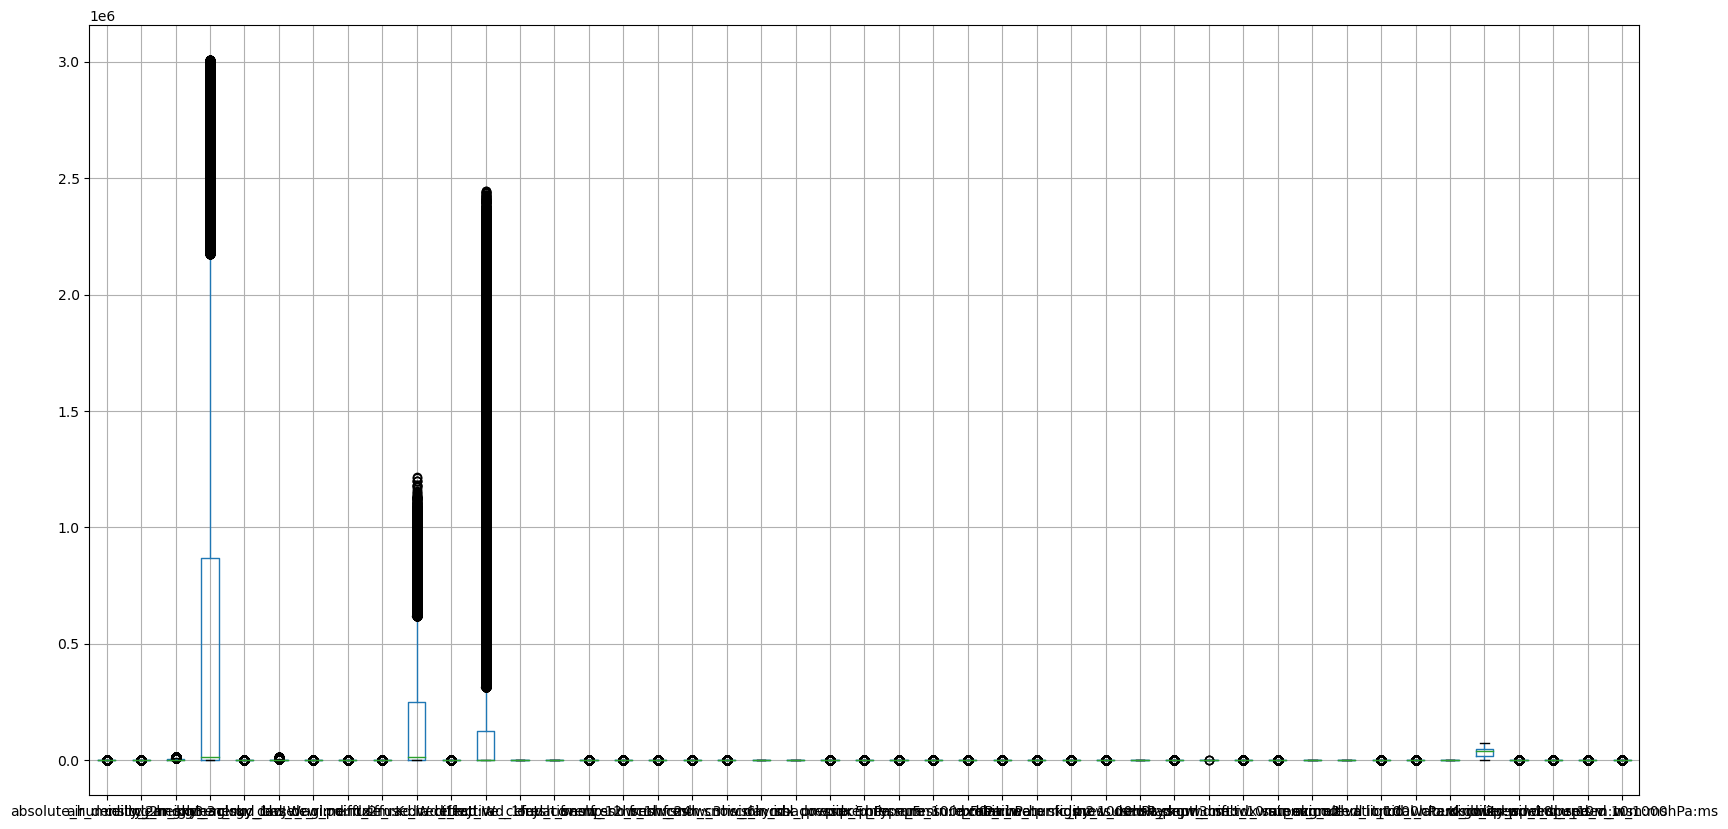

In [18]:
X_obs_c.boxplot(figsize=(20, 10))

## Findings

We can see that 3 of the features have a lot of outliers on all of the locations. Let's investigate closer:

#### Finding outlier features

In [19]:
all_features = X_obs_a.columns.tolist()
# Find outliers by index according to the boxplot
outlier_features = [all_features[i] for i in (4, 10, 12)]
print(outlier_features)

['clear_sky_energy_1h:J', 'diffuse_rad_1h:J', 'direct_rad_1h:J']


Looked up the features and found this

**clear_sky_energy_1h:J** = clear sky energy of previous time period, available up to 24h [J/m2]

**diffuse_rad_1h:J** = accumulated diffuse radiation of previous time period, available up to 24h [J/m2]

**direct_rad_1h:J** = accumulated direct radiation of previous time period, available up to 24h [J/m2]

All of these are for the last hour, so I decided to investigate the datasets further

In [20]:
X_obs_a.head(100)

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.000000e+00,0.000000,1744.900024,0.0,280.299988,0.000000,0.000000,0.000000,0.000000e+00,98.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.799988,0.00,0.0,994.200012,1000.299988,0.0,0.0,73.099998,1006.299988,NaN,0.0,0.0,-0.0,0.1,342.834015,-3.202000,0.0,285.899994,100.000000,39640.101562,3.7,-3.6,-0.8,-0.0
1,2019-06-02 22:15:00,7.7,1.229,1734.000000,0.000000e+00,0.000000,1734.000000,0.0,280.299988,0.000000,0.000000,0.000000,0.000000e+00,99.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.500000,0.00,0.0,993.900024,999.900024,0.0,0.0,72.199997,1006.000000,NaN,0.0,0.0,-0.0,0.2,346.294006,-3.650000,0.0,286.100006,100.000000,40123.898438,3.6,-3.6,-0.6,-0.0
2,2019-06-02 22:30:00,7.7,1.228,1723.500000,0.000000e+00,0.000000,1723.500000,0.0,280.299988,0.000000,0.000000,0.000000,0.000000e+00,99.199997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.099976,0.00,0.0,993.599976,999.599976,0.0,0.0,71.199997,1005.599976,NaN,0.0,0.0,-0.0,0.2,349.768005,-3.998000,0.0,286.299988,100.000000,40628.300781,3.6,-3.6,-0.4,-0.0
3,2019-06-02 22:45:00,7.7,1.226,1713.400024,0.000000e+00,0.000000,1713.400024,0.0,280.299988,0.000000,0.000000,0.000000,0.000000e+00,99.400002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.799988,0.00,0.0,993.299988,999.299988,0.0,0.0,70.199997,1005.299988,NaN,0.0,0.0,-0.0,0.2,353.251007,-4.247000,0.0,286.600006,100.000000,41153.601562,3.5,-3.5,-0.2,-0.0
4,2019-06-02 23:00:00,7.7,1.225,1703.599976,0.000000e+00,0.000000,1703.599976,0.0,280.299988,0.000000,0.000000,0.000000,0.000000e+00,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.500000,0.00,0.0,993.000000,999.000000,0.0,0.0,69.199997,1005.000000,NaN,0.0,0.0,-0.0,0.2,356.742004,-4.393000,0.0,286.799988,100.000000,41699.898438,3.5,-3.5,0.0,-0.0
5,2019-06-02 23:15:00,7.7,1.224,1694.199951,0.000000e+00,0.000000,1694.199951,0.0,280.299988,0.000000,0.000000,0.000000,0.000000e+00,99.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.299988,0.00,0.0,992.799988,998.799988,0.0,0.0,68.400002,1004.799988,NaN,0.0,0.0,-0.0,0.2,0.235000,-4.438000,0.0,286.899994,100.000000,36427.199219,3.4,-3.4,0.2,-0.0
6,2019-06-02 23:30:00,7.7,1.223,1685.099976,0.000000e+00,0.000000,1685.099976,0.0,280.299988,0.000000,0.000000,0.000000,0.000000e+00,99.800003,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.099976,0.00,0.0,992.599976,998.500000,0.0,0.0,67.599998,1004.500000,NaN,0.0,0.0,-0.0,0.2,3.728000,-4.379000,0.0,286.899994,100.000000,31136.000000,3.3,-3.3,0.4,-0.0
7,2019-06-02 23:45:00,7.7,1.222,1676.400024,0.000000e+00,0.000000,1676.400024,0.0,280.299988,0.000000,0.000000,0.000000,0.000000e+00,99.900002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1004.900024,0.00,0.0,992.299988,998.299988,0.0,0.1,66.800003,1004.299988,NaN,0.0,0.0,-0.0,0.2,7.218000,-4.219000,0.0,287.000000,100.000000,25819.500000,3.2,-3.2,0.5,-0.0
8,2019-06-03 00:00:00,7.7,1.221,1668.099976,0.000000e+00,0.000000,1668.099976,0.0,280.200012,0.000000,0.000000,0.000000,0.000000e+00,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1004.599976,0.00,0.0,992.099976,998.099976,0.0,0.1,66.000000,1004.099976,NaN,0.0,0.0,-0.0,0.2,9.741000,-3.910000,0.0,287.000000,100.000000,20473.000000,3.2,-3.1,0.7,-0.0
9,2019-06-03 00:15:00,7.8,1.220,1598.199951,0.000000e+00,0.000000,1598

### Boxplot A

<Axes: >

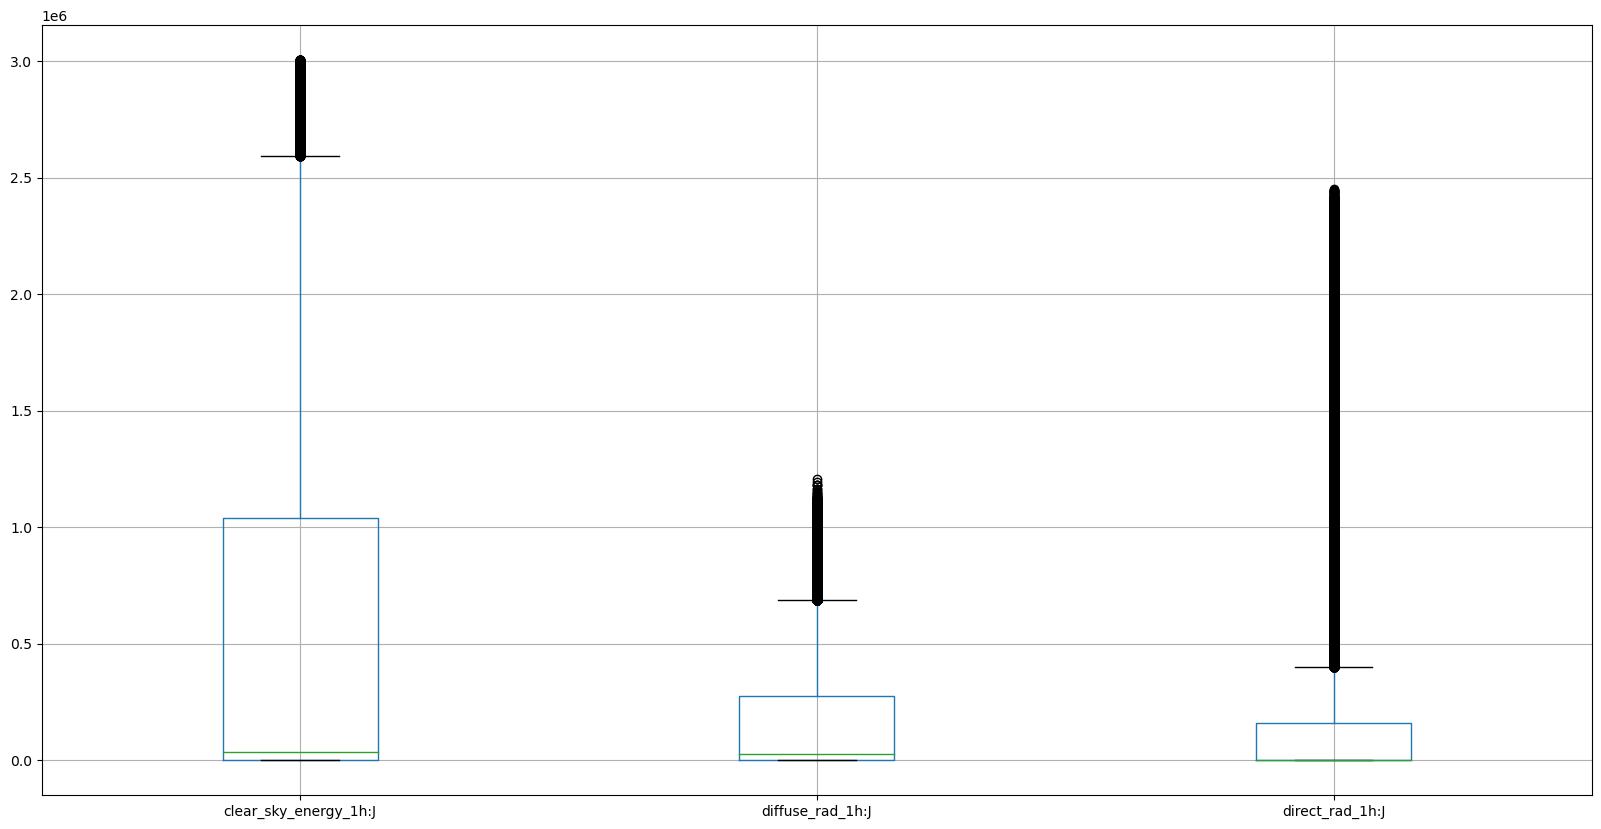

In [21]:
X_obs_a.boxplot(outlier_features, figsize=(20, 10))